In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/home/alumno/Documentos/Proyecto/separado.csv', sep= '\t')
df.head()

,Unnamed: 0,title,text,label
0,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
1,1,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
2,2,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
3,3,Iranian woman jailed for fictional unpublished...,Print An Iranian woman has been sentenced to ...,1
4,4,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi...",0


In [5]:
df.isnull().sum()

Unnamed: 0      0
title         520
text           39
label           0
dtype: int64

In [6]:
df = df.dropna()
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(5)

,index,Unnamed: 0,title,text,label
0,0,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
1,1,1,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
2,2,2,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
3,3,3,Iranian woman jailed for fictional unpublished...,Print An Iranian woman has been sentenced to ...,1
4,4,4,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi...",0


In [7]:
# Seperating the dependent and independent variable
x = df.drop('label',axis = 1)
y = df['label']

In [8]:
x = x.drop(['Unnamed: 0'],axis=1)
x.reset_index(inplace=True)

In [9]:
#Merging the all row data in a single list
headline =[]
for row in range(len(x.title)):
    headline.append(' '.join(str(word).lower() for word in x.iloc[row,0:2]))

In [10]:
headline[0]

'0 flynn: hillary clinton, big woman on campus - breitbart'

In [11]:
from wordcloud import WordCloud

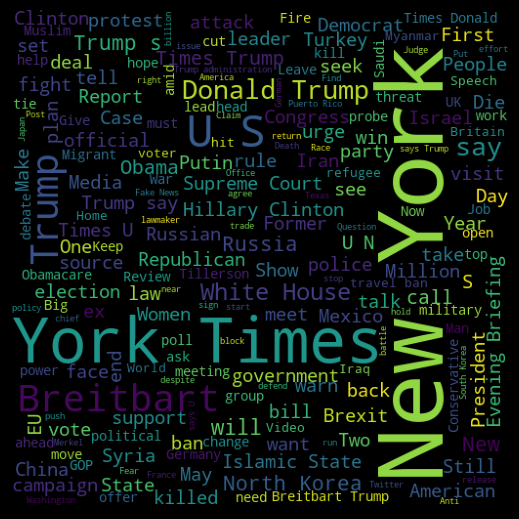

In [19]:
real=' '.join(list(messages[messages['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [12]:
df2 = pd.read_csv('/home/alumno/Documentos/Proyecto/fake_or_real_news.csv', sep= ',')
df2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df2["label"]=df2["label"].replace(["FAKE","REAL"],value=[1,0])

In [14]:
df2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [15]:
df2.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [16]:
df2 = df2.dropna()
messages1=df2.copy()
messages1.reset_index(inplace=True)
messages1.head(5)

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [17]:
# Seperating the dependent and independent variable
a = df2.drop('label',axis = 1)
b = df2['label']

In [18]:
c= pd.concat([y,b], sort=False)
print(c.head(1))

0    0
Name: label, dtype: int64


In [19]:
a = a.drop(['Unnamed: 0'],axis=1)
a.reset_index(inplace=True)

In [20]:
miHeadline =[]
for row in range(len(a.text)):
    miHeadline.append(' '.join(str(word).lower() for word in a.iloc[row,0:2]))

In [21]:
miHeadline[8]


"8 fact check: trump and clinton at the 'commander-in-chief' forum"

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
cv = cv.fit(headline + miHeadline)
X = cv.transform(headline)

In [23]:
print(A)


NameError: name 'A' is not defined

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [77]:
from sklearn.ensemble import RandomForestClassifier
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
randomclassifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [78]:
y_pred =randomclassifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_m = confusion_matrix(y_test,y_pred)

print(confusion_m)
print('\n')
accuracy_score(y_test, y_pred)

[[8150  547]
 [ 613 8157]]




0.9335890536440145

In [80]:
print(X_test)


  (0, 2306)	0.5166579625576563
  (0, 96567)	0.28028853555095373
  (0, 97633)	0.13101102118226635
  (0, 102748)	0.43790202988876176
  (0, 102778)	0.29913758249846073
  (0, 104971)	0.1226302863714383
  (0, 105586)	0.13374338917560416
  (0, 106777)	0.4225923753101084
  (0, 113557)	0.27898830696168037
  (0, 116669)	0.2583664944884094
  (1, 20067)	0.5246482225335486
  (1, 95398)	0.3743513574633193
  (1, 96779)	0.4101635241422237
  (1, 98431)	0.2943774422561259
  (1, 100455)	0.11930262573923762
  (1, 105190)	0.19551487089487704
  (1, 106583)	0.4318338217232286
  (1, 109973)	0.20590380304140804
  (1, 113881)	0.10009512202408809
  (1, 116305)	0.19585215934064365
  (2, 1907)	0.40917780386267427
  (2, 88464)	0.11426582908056183
  (2, 89086)	0.13923902579384106
  (2, 95908)	0.2859146008657076
  (2, 96488)	0.26694218871852926
  :	:
  (17465, 99050)	0.20628919608432517
  (17465, 101880)	0.21652158182826317
  (17465, 105622)	0.17122718253503952
  (17465, 108500)	0.18689413173547573
  (17465, 108982)

In [81]:
Y = cv.transform(miHeadline)

In [82]:
mipred =randomclassifier.predict(Y)


In [83]:
confusion_m = confusion_matrix(df2['label'],mipred)


print(confusion_m)
print('\n')
accuracy_score(df2['label'], mipred)

[[2095 1076]
 [ 104 3060]]




0.813733228097869

In [84]:
reddit = pd.read_csv('/home/alumno/Documentos/Proyecto/reddit.csv', sep= '\t')
reddit.head()

,Unnamed: 0,title
0,0,Russia-Ukraine stay updates: Ukraine refutes U...
1,1,U.S. Army's weapons contract reviews accelerat...
2,2,Canada sanctions 22 Belarusian officials over ...
3,3,Ukraine receives 2.5 billion euros in assistan...
4,4,Millions of lives under threat in Ukraine this...


In [85]:
reddit.isnull().sum()

Unnamed: 0    0
title         0
dtype: int64

In [86]:
reddit = reddit.dropna()
messages1=reddit.copy()
messages1.reset_index(inplace=True)
messages1.head(5)

,index,Unnamed: 0,title
0,0,0,Russia-Ukraine stay updates: Ukraine refutes U...
1,1,1,U.S. Army's weapons contract reviews accelerat...
2,2,2,Canada sanctions 22 Belarusian officials over ...
3,3,3,Ukraine receives 2.5 billion euros in assistan...
4,4,4,Millions of lives under threat in Ukraine this...


In [87]:
reddit = reddit.drop(['Unnamed: 0'],axis=1)
reddit.reset_index(inplace=True)

In [88]:
reddit.head()

,index,title
0,0,Russia-Ukraine stay updates: Ukraine refutes U...
1,1,U.S. Army's weapons contract reviews accelerat...
2,2,Canada sanctions 22 Belarusian officials over ...
3,3,Ukraine receives 2.5 billion euros in assistan...
4,4,Millions of lives under threat in Ukraine this...


In [89]:
lred =[]
for row in range(len(reddit.title)):
    lred.append(' '.join(str(word).lower() for word in reddit.iloc[row,0:2]))

In [90]:
lred[5]

'5 european commission disburses eur 2.5b in aid to ukraine'

In [91]:
R = cv.transform(lred)

In [92]:
redpred =randomclassifier.predict(R)

In [93]:
print(redpred)

[1 0 0 ... 1 0 1]


In [94]:
for i in redpred:
    print(i, end = ' ')

1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 

In [95]:
sum = 0
for i in redpred:
    sum += i
print(sum/len(redpred))

0.3358358358358358


In [96]:
trump = pd.read_csv('/home/alumno/Documentos/Proyecto/trump.csv', sep= '\t')
trump.head()

,Unnamed: 0,text
0,0,kanye west asks donald trump to be running mat...
1,1,donald trump leads ron desantis in hypothetica...
2,2,can donald trump resist the lure of twitter ne...
3,3,accountant testifies trump claimed decade of h...
4,4,what joe biden approval rating means for his c...


In [97]:
trump.isnull().sum()

Unnamed: 0    0
text          0
dtype: int64

In [98]:
trump = trump.dropna()
messages1=trump.copy()
messages1.reset_index(inplace=True)
messages1.head(5)

,index,Unnamed: 0,text
0,0,0,kanye west asks donald trump to be running mat...
1,1,1,donald trump leads ron desantis in hypothetica...
2,2,2,can donald trump resist the lure of twitter ne...
3,3,3,accountant testifies trump claimed decade of h...
4,4,4,what joe biden approval rating means for his c...


In [99]:
trump = trump.drop(['Unnamed: 0'],axis=1)
trump.reset_index(inplace=True)

In [100]:
trump.head()

,index,text
0,0,kanye west asks donald trump to be running mat...
1,1,donald trump leads ron desantis in hypothetica...
2,2,can donald trump resist the lure of twitter ne...
3,3,accountant testifies trump claimed decade of h...
4,4,what joe biden approval rating means for his c...


In [101]:
ltrump =[]
for row in range(len(trump.text)):
    ltrump.append(' '.join(str(word).lower() for word in trump.iloc[row,0:2]))

In [102]:
ltrump[0]

'0 kanye west asks donald trump to be running mate as president via yep my vid brea '

In [103]:
T = cv.transform(ltrump)


In [104]:
tpred =randomclassifier.predict(T)

In [105]:
print(tpred)

[1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 1]


In [106]:
for i in tpred:
    print(i, end = ' ')
    

1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 

In [201]:
tsum = 0
for i in tpred:
    tsum += i
print(tsum/len(tpred))

0.6247030878859857


In [108]:
elon = pd.read_csv('/home/alumno/Documentos/Proyecto/elon.csv', sep= '\t')
elon.head()

,Unnamed: 0,text
0,0,elon musk loses billion in net worth as tesla ...
1,1,elon musk wasn twitter supposed to die by now ...
2,2,investors may see tesla as house of cards afte...
3,3,severely increased post musk walking into that...
4,4,news elon musk tweets namaste to indians twit...


In [109]:
elon.isnull().sum()

Unnamed: 0    0
text          0
dtype: int64

In [110]:
elon = elon.dropna()
messages1=elon.copy()
messages1.reset_index(inplace=True)
messages1.head(5)


,index,Unnamed: 0,text
0,0,0,elon musk loses billion in net worth as tesla ...
1,1,1,elon musk wasn twitter supposed to die by now ...
2,2,2,investors may see tesla as house of cards afte...
3,3,3,severely increased post musk walking into that...
4,4,4,news elon musk tweets namaste to indians twit...


In [111]:
elon = elon.drop(['Unnamed: 0'],axis=1)
elon.reset_index(inplace=True)

In [112]:
elon.head()

,index,text
0,0,elon musk loses billion in net worth as tesla ...
1,1,elon musk wasn twitter supposed to die by now ...
2,2,investors may see tesla as house of cards afte...
3,3,severely increased post musk walking into that...
4,4,news elon musk tweets namaste to indians twit...


In [113]:
lelon =[]
for row in range(len(elon.text)):
    lelon.append(' '.join(str(word).lower() for word in elon.iloc[row,0:2]))

In [114]:
lelon[0]

'0 elon musk loses billion in net worth as tesla stock prices plummet news'

In [115]:
E = cv.transform(lelon)


In [116]:
epred =randomclassifier.predict(E)

In [117]:
print(epred)

[0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 

In [118]:
for i in epred:
    print(i, end = ' ')
    

0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 

In [119]:
esum = 0
for i in epred:
    esum += i
print(esum/len(epred))

0.8024539877300614


In [120]:
tred = pd.read_csv('/home/alumno/Documentos/Proyecto/tred.csv', sep= '\t')
tred.head()

,Unnamed: 0,title
0,0,"Donald Trump dined with white nationalist, Hol..."
1,1,"Donald Trump dined with white nationalist, Hol..."
2,2,"Please vote for, ""the new Teflon Don""! vote do..."
3,3,Jean Carroll files new lawsuit against Donald ...
4,4,Donald Trump Twitter account reappear after El...


In [121]:
tred.isnull().sum()

Unnamed: 0    0
title         0
dtype: int64

In [122]:
tred = tred.dropna()
messages1=tred.copy()
messages1.reset_index(inplace=True)
messages1.head(5)

,index,Unnamed: 0,title
0,0,0,"Donald Trump dined with white nationalist, Hol..."
1,1,1,"Donald Trump dined with white nationalist, Hol..."
2,2,2,"Please vote for, ""the new Teflon Don""! vote do..."
3,3,3,Jean Carroll files new lawsuit against Donald ...
4,4,4,Donald Trump Twitter account reappear after El...


In [123]:
tred = tred.drop(['Unnamed: 0'],axis=1)
tred.reset_index(inplace=True)

In [124]:
ltred =[]
for row in range(len(tred.title)):
    ltred.append(' '.join(str(word).lower() for word in tred.iloc[row,0:2]))

In [125]:
TR = cv.transform(ltred)

In [126]:
tredpred =randomclassifier.predict(TR)

In [127]:
for i in tredpred:
    print(i, end = ' ')
    

0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 

In [202]:
tpsum = 0

for i in tredpred:
    tpsum += i
print(tpsum/len(tredpred))

0.6441441441441441


In [195]:
trpl= pd.DataFrame(tredpred, columns= ['Trump Reddit'])
trpl.head()

,Trump Reddit
0,0
1,0
2,1
3,1
4,0


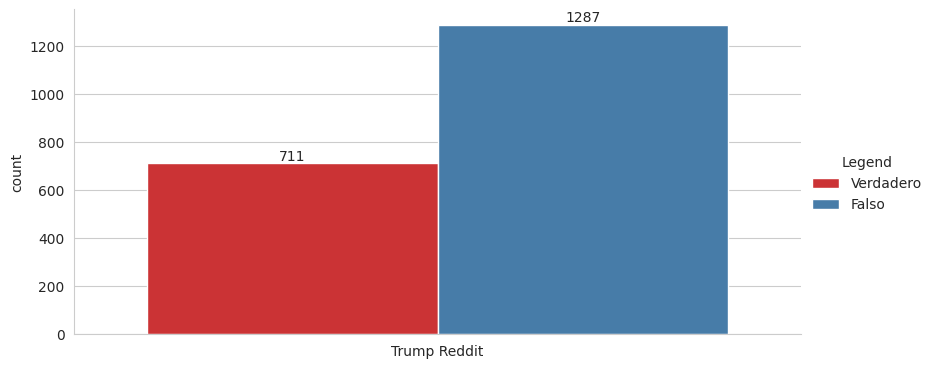

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_long = trpl.melt(value_vars='Trump Reddit', value_name='Legend').replace({'Legend': {0: 'Verdadero', 1: 'Falso'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()


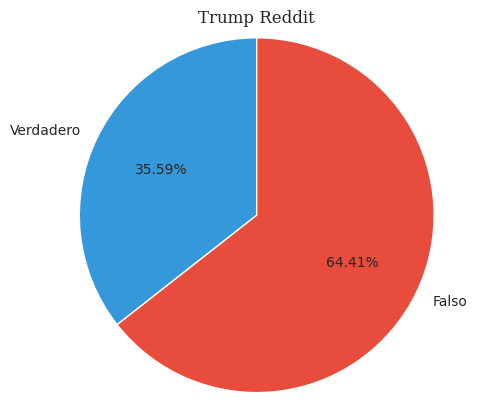

In [209]:

etiquetas= ['Verdadero', 'Falso']
porcentajes= [711, 1287]
colores= ['#3498db', '#e74c3c']

plt.pie(porcentajes, labels=etiquetas, colors = colores, startangle= 90, explode= (0, 0), radius = 1.2, autopct = '%.2f%%')

plt.title('Trump Reddit', fontfamily=  'serif')

plt.show()

In [197]:
tpl= pd.DataFrame(tpred, columns= ['Trump Twitter'])
tpl.head()


,Trump Twitter
0,1
1,0
2,1
3,0
4,1


In [203]:
tpl.count()

Trump Twitter    421
dtype: int64

In [198]:
rpl= pd.DataFrame(redpred, columns= ['Ukraine Reddit'])
rpl.head()

,Ukraine Reddit
0,1
1,0
2,0
3,0
4,1


In [199]:
epl= pd.DataFrame(epred, columns= ['Elon Musk Twitter'])
epl.head()

,Elon Musk Twitter
0,0
1,1
2,1
3,1
4,0


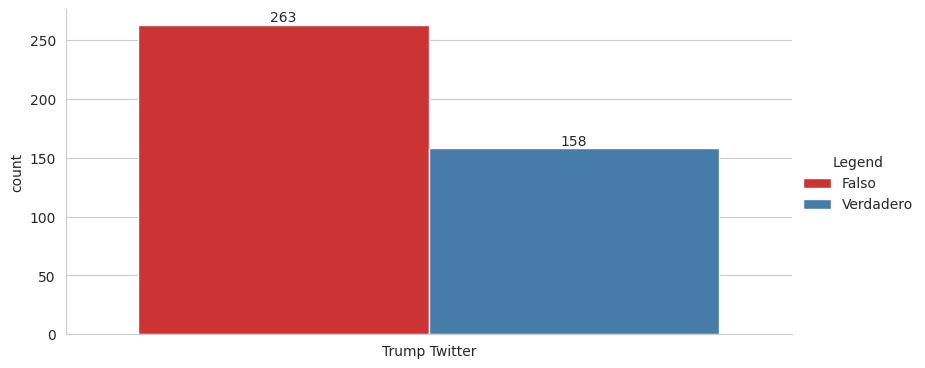

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_long = tpl.melt(value_vars='Trump Twitter', value_name='Legend').replace({'Legend': {0: 'Verdadero', 1: 'Falso'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

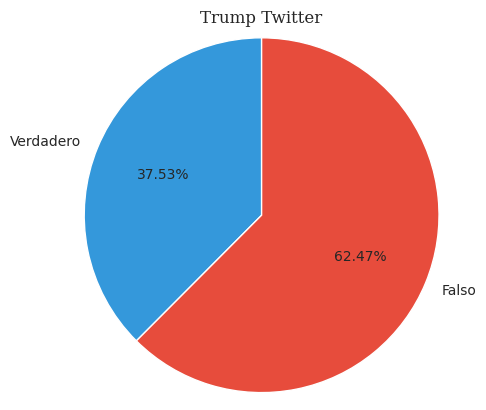

In [210]:
etiquetas= ['Verdadero', 'Falso']
porcentajes= [158, 263]
colores= ['#3498db', '#e74c3c']

plt.pie(porcentajes, labels=etiquetas, colors = colores, startangle= 90, explode= (0, 0), radius = 1.2, autopct = '%.2f%%')

plt.title('Trump Twitter', fontfamily=  'serif')

plt.show()

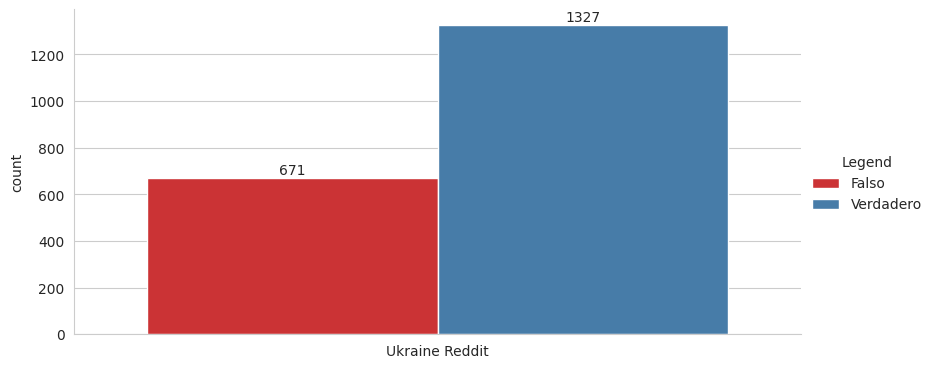

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_long = rpl.melt(value_vars='Ukraine Reddit', value_name='Legend').replace({'Legend': {0: 'Verdadero', 1: 'Falso'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

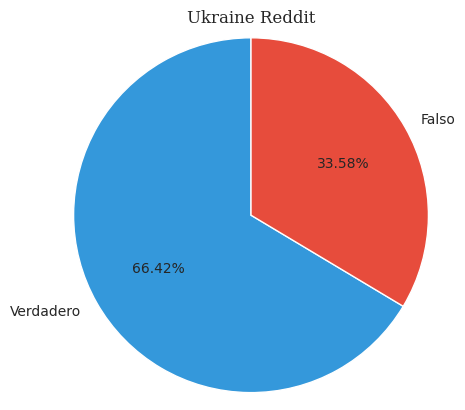

In [211]:
etiquetas= ['Verdadero', 'Falso']
porcentajes= [1327, 671]
colores= ['#3498db', '#e74c3c']

plt.pie(porcentajes, labels=etiquetas, colors = colores, startangle= 90, explode= (0, 0), radius = 1.2, autopct = '%.2f%%')

plt.title('Ukraine Reddit', fontfamily=  'serif')

plt.show()

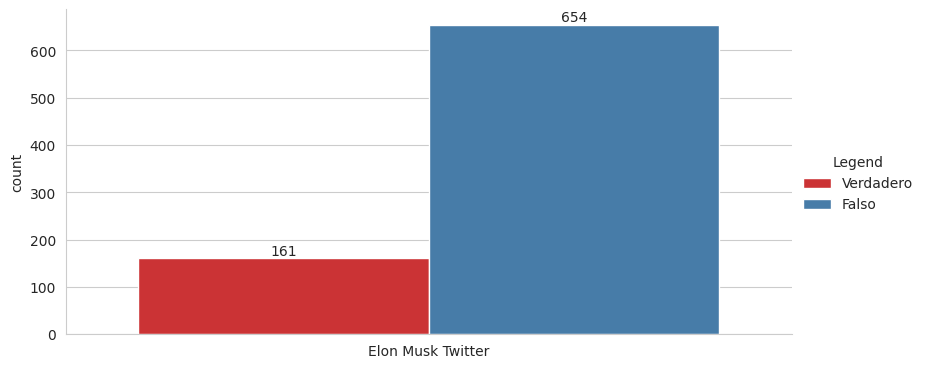

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_long = epl.melt(value_vars='Elon Musk Twitter', value_name='Legend').replace({'Legend': {0: 'Verdadero', 1: 'Falso'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

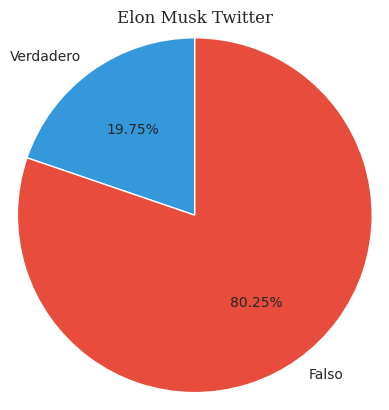

In [212]:
etiquetas= ['Verdadero', 'Falso']
porcentajes= [161, 654]
colores= ['#3498db', '#e74c3c']

plt.pie(porcentajes, labels=etiquetas, colors = colores, startangle= 90, explode= (0, 0), radius = 1.2, autopct = '%.2f%%')

plt.title('Elon Musk Twitter', fontfamily=  'serif')

plt.show()

In [214]:
result = pd.concat([trpl, rpl, tpl, epl], axis= 1)
result.head()

,Trump Reddit,Ukraine Reddit,Trump Twitter,Elon Musk Twitter
0,0,1,1.0,0.0
1,0,0,0.0,1.0
2,1,0,1.0,1.0
3,1,0,0.0,1.0
4,0,1,1.0,0.0


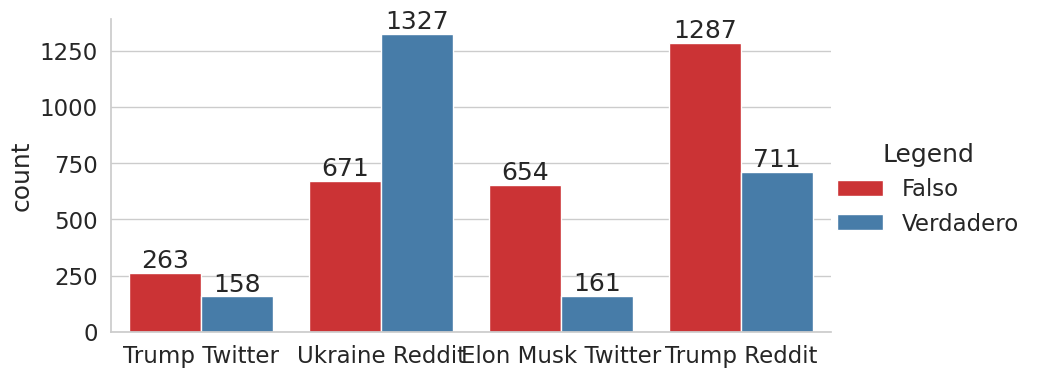

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_long = result.melt(value_vars=['Trump Twitter', 'Ukraine Reddit','Elon Musk Twitter', 'Trump Reddit'], value_name='Legend').replace({'Legend': {0: 'Verdadero', 1: 'Falso'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

In [233]:
def plotting_percentages(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values

    # Sort the column values for plotting    

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=df, 
                    height=8, aspect=2, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'Porcentaje', fontdict={'fontsize': 20})
    plt.xticks(rotation=0)
    return g

In [231]:
d = {'Fuente': ['Trump Reddit', 'Trump Reddit', 'Trump Twitter', 'Trump Twitter'], 'label': ['Verdadero', 'Falso', 'Verdadero', 'Falso'], 'percent':[64.41, 35.59, 62.47, 37.53]}
grafica= pd.DataFrame(data= d)
grafica.head()

,Fuente,label,percent
0,Trump Reddit,Verdadero,64.41
1,Trump Reddit,Falso,35.59
2,Trump Twitter,Verdadero,62.47
3,Trump Twitter,Falso,37.53


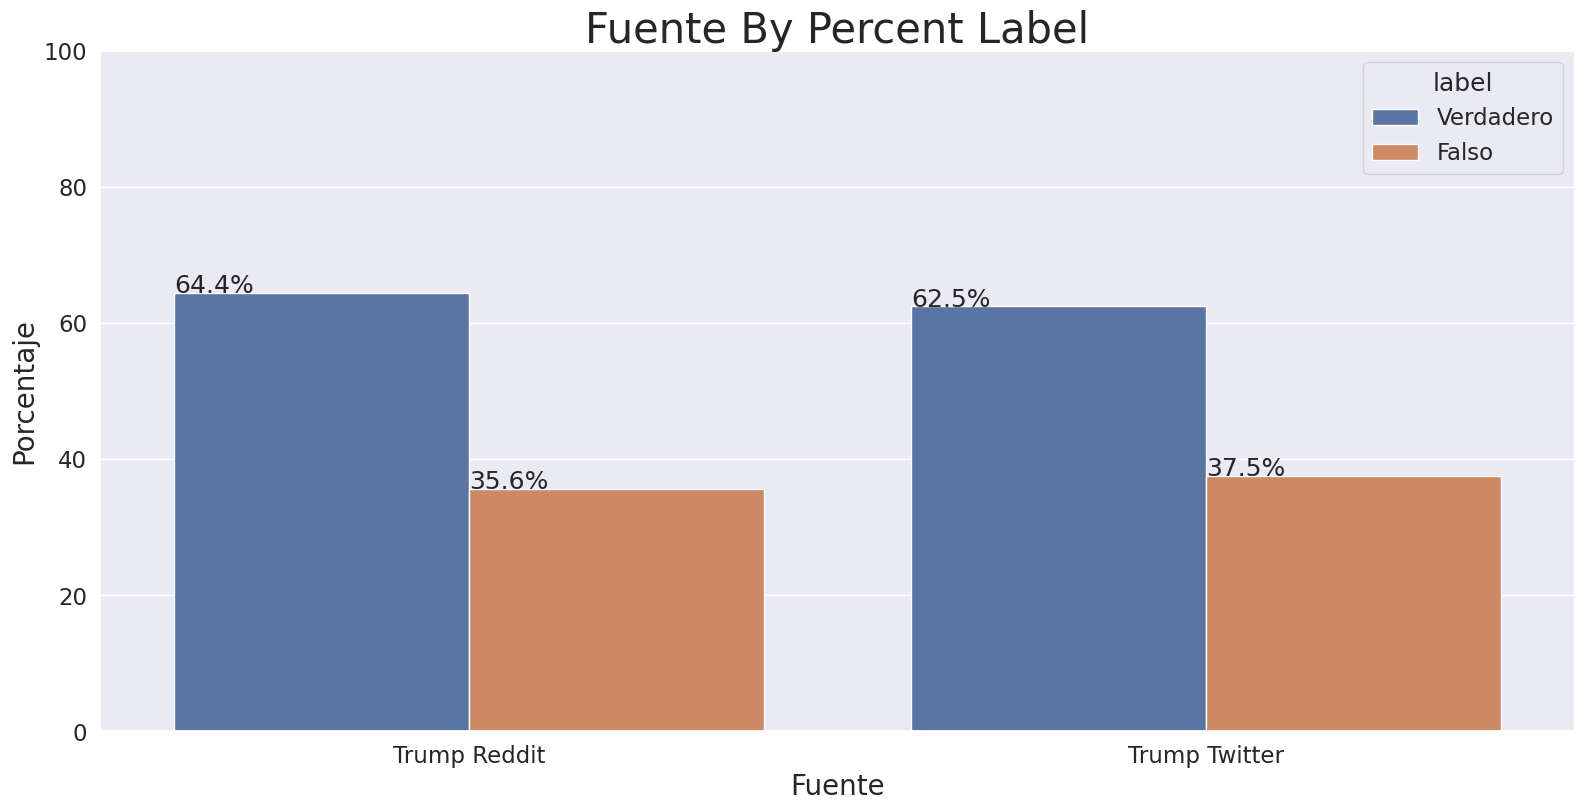

In [234]:
plotting_percentages(grafica, 'Fuente', 'label')